# Visualizing and analyzing the data

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Reading the dataset

In [2]:
data=pd.read_csv('dataset.csv')
data

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3+,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


In [3]:
data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
data.tail()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
609,lp002978,female,no,0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3+,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y
613,lp002990,female,no,0,graduate,yes,4583,0.0,133.0,360.0,0.0,semiurban,n


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Univariate Analysis

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('dataset.csv')
data.mean()

applicantincome      5403.459283
coapplicantincome    1621.245798
loanamount            146.412162
loan_amount_term      342.000000
credit_history          0.842199
dtype: float64

In [8]:
data.median()

applicantincome      3812.5
coapplicantincome    1188.5
loanamount            128.0
loan_amount_term      360.0
credit_history          1.0
dtype: float64

In [9]:
data.shape

(614, 13)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


(None, None)

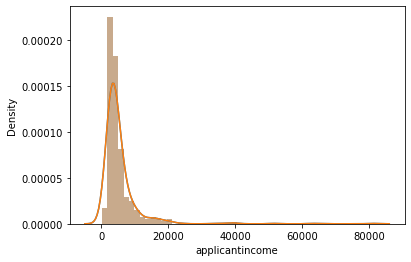

In [10]:
print(sns.distplot(data['applicantincome'])), print(sns.distplot(data['applicantincome'],kde=True,))

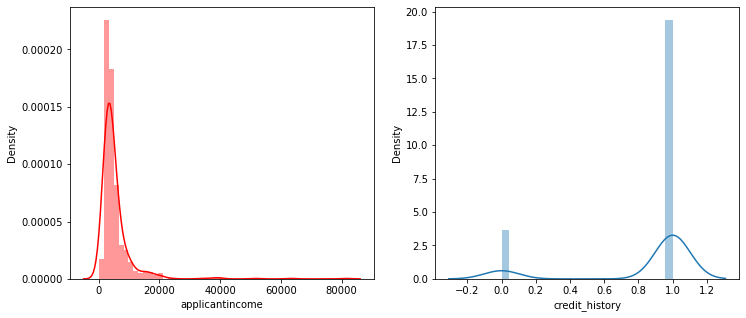

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['applicantincome'], color='r')
plt.subplot(122)
sns.distplot(data['credit_history'])
plt.show()

## Bivariate Analysis

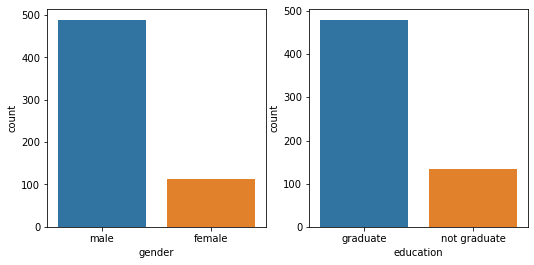

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['gender'])
plt.subplot(1,4,2)
sns.countplot(data['education'])
plt.show()

<AxesSubplot:xlabel='property_area', ylabel='count'>

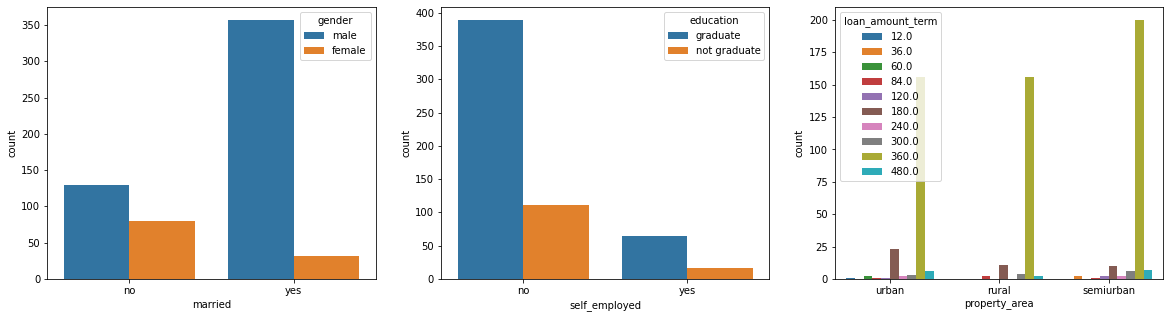

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['married'], hue=data['gender'])
plt.subplot(132)
sns.countplot(data['self_employed'], hue=data['education'])
plt.subplot(133)
sns.countplot(data['property_area'], hue=data['loan_amount_term'])



## Multivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='applicantincome'>

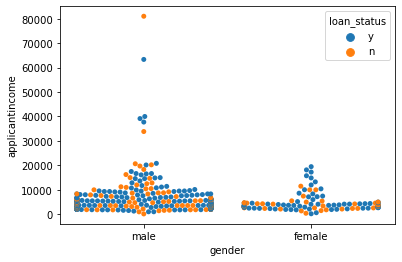

In [14]:
sns.swarmplot(data['gender'], data['applicantincome'], hue=data['loan_status'])

## Descriptive Analysis

In [15]:
data.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Pre-Processing

In [16]:
data.shape

(614, 13)

## Checking for null values

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking for null values

In [18]:
data.isnull()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.gender = le.fit_transform(data.gender)
data.married = le.fit_transform(data.married)
data.education = le.fit_transform(data.education)
data.self_employed = le.fit_transform(data.self_employed)
data.property_area = le.fit_transform(data.property_area)
data.loan_status = le.fit_transform(data.loan_status)

In [21]:
data['gender'] = data['gender'].fillna(data['gender'].mode( )[0])
data['married'] = data['married'].fillna(data['married'].mode()[0])
data['dependents']=data['dependents'].str.replace('+','')
data['dependents'] = data['dependents'].fillna(data['dependents'].mode( )[0])
data['self_employed'] = data['self_employed'].fillna(data['self_employed'].mode( )[0])
data['loanamount'] = data['loanamount'].fillna(data['loanamount'].mode( )[0])
data['loan_amount_term'] = data['loan_amount_term'].fillna(data['loan_amount_term'].mode( )[0])
data['credit_history'] = data['credit_history'].fillna(data['credit_history'].mode( )[0])

# Handling Categorical values

In [22]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 2


In [23]:
data.fillna(0)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,lp001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,lp001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,lp001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,lp001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,lp002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,lp002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,lp002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [24]:
data['gender']=data['gender'].astype('int64')
data['married']=data['married'].astype('int64')
data['dependents']=data['dependents'].astype('int64')
data['self_employed']=data['self_employed'].astype('int64')
data['coapplicantincome']=data['coapplicantincome'].astype('int64')
data['loanamount']=data['loanamount'].astype('int64')
data['loan_amount_term']=data['loan_amount_term'].astype('int64')
data['credit_history']=data['credit_history'].astype('int64')

## Balancing the dataset

In [25]:
from imblearn.combine import SMOTETomek
smote=SMOTETomek(0.90)

In [26]:
y=data['loan_status']
x=data.drop(columns=['loan_status','loan_id'],axis=1)

In [27]:
x_bal,y_bal=smote.fit_resample(x,y)

In [28]:
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: loan_status, dtype: int64
1    358
0    315
Name: loan_status, dtype: int64


# Scaling the data

In [29]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [31]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

In [32]:
x_bal=pd.DataFrame(x_bal)

## Splitting Data into train and test

In [33]:
x_train, x_test, y_train, y_test=train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)

# Model building

## Decision Tree model

In [34]:
def decisiontree(x_train,x_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred=dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

## Random Forest model

In [35]:
def randomForest(x_train,x_test,y_train,y_test):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred=rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


## KNN model

In [36]:
def KNN(x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred=knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))


## Xgboost model

In [37]:
def xgboost(x_train,x_test,y_train,y_test):
    xg=GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred=xg.predict(x_test)
    print('***GradientBoostingstClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))


## Compare the model

In [38]:
randomForest(x_train, x_test, y_train, y_test)

***RandomForestClassifier***
Confusion matrix
[[ 76  24]
 [ 11 112]]
Classification report
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       100
           1       0.82      0.91      0.86       123

    accuracy                           0.84       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.85      0.84      0.84       223



In [39]:
decisiontree(x_train, x_test, y_train, y_test) 

***DecisionTreeClassifier***
Confusion matrix
[[ 80  20]
 [ 23 100]]
Classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.83      0.81      0.82       123

    accuracy                           0.81       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223



In [40]:
KNN(x_train, x_test, y_train, y_test)

***KNeighborsClassifier***
Confusion matrix
[[ 67  33]
 [ 14 109]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       100
           1       0.77      0.89      0.82       123

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [41]:
xgboost(x_train, x_test, y_train, y_test) 

***GradientBoostingstClassifier***
Confusion matrix
[[ 72  28]
 [ 13 110]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       100
           1       0.80      0.89      0.84       123

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.81       223



## Evaluating performance of the model and saving the model

In [42]:
from sklearn.model_selection import cross_val_score
import pickle

In [43]:
rf=RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
yPred=rf.predict(x_test)

In [46]:
f1_score(yPred,y_test,average='weighted')

0.8495071431866992

In [47]:
cv=cross_val_score(rf,x,y,cv=5)

In [48]:
np.mean(cv)

0.7817406370785018

In [49]:
pickle.dump(rf,open('rf.pk1', 'wb'))